In [1]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [2]:
from dvclive.keras import DVCLiveCallback
from dvclive import Live

live = Live(save_dvc_exp=True)

In [3]:
import pathlib
 
# current working directory
print(pathlib.Path().absolute())

/Users/blarhdir/Documents/sw-data-mlops-internship/notebooks

In [4]:
from sorcery import (assigned_names, unpack_keys, unpack_attrs,
                     dict_of, print_args, call_with_name,
                     delegate_to_attr, maybe, select_from)

### PARAMS

In [5]:
UTILS_DIR = "./"
DATA_DIR = '../data/'
MAX_LEN = 20
EPOCHS = 100
EARLY_STOPPING_MONITOR = 'val_loss'
EARLY_STOPPING_MIN_DELTA = 0
EARLY_STOPPING_PATIENCE = 5
EARLY_STOPPING_MODE = 'auto'

# # UI friendly ??
# training_params = dict_of(MAX_LEN, EPOCHS, EARLY_STOPPING_MONITOR, EARLY_STOPPING_MIN_DELTA, EARLY_STOPPING_PATIENCE, EARLY_STOPPING_MODE)

In [6]:
# Parameters
UTILS_DIR = "./"
DATA_DIR = "../data/"
MAX_LEN = 20
EPOCHS = 100
EARLY_STOPPING_MONITOR = "val_loss"
EARLY_STOPPING_MIN_DELTA = 0
EARLY_STOPPING_PATIENCE = 5
EARLY_STOPPING_MODE = "auto"


### Added by DataScientists

### Added by DataScientists

In [7]:
sys.path.append(UTILS_DIR)

from utils.plot_target import plot_target

### Added by DataScientists

## TRAINING

In [8]:
X = pickle.load(open(DATA_DIR + 'X.pckl', 'rb'))
X_train = pickle.load(open(DATA_DIR + 'X_train.pckl', 'rb'))
X_test = pickle.load(open(DATA_DIR + 'X_test.pckl', 'rb'))

y = pickle.load(open(DATA_DIR + 'y.pckl', 'rb'))
y_train = pickle.load(open(DATA_DIR + 'y_train.pckl', 'rb'))
y_test = pickle.load(open(DATA_DIR + 'y_test.pckl', 'rb'))

In [9]:
X_train

4929    retweet follow followback gain follow ganseyma...
5545    rainstorm downtown gloucester gloucester capea...
4300    ian hellfire got mistake boss got worse cause ...
3298    fwd literally jumped bed put beach clothes ran...
2038    permits bear hunting danger outnumbering actua...
                              ...                        
7254    memory victims hiroshima nagasaki never ban nu...
3934    flood advisory effect shelby county alabama we...
1129                                wasp dive bombed face
5946                            love waking dad screaming
1783    slamming door lesson learned let another lover...
Name: Text_cleaning, Length: 6090, dtype: object

In [10]:
counter = pickle.load(open(DATA_DIR + 'counter.pckl', 'rb'))

In [11]:
num_words = len(counter)

In [12]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [13]:
X_train = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(X_train, maxlen = MAX_LEN, truncating="post")

In [14]:
X_test = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(X_test,maxlen=MAX_LEN, truncating="post")

In [15]:
my_callbacks  = [EarlyStopping(monitor = EARLY_STOPPING_MONITOR,
                              min_delta = EARLY_STOPPING_MIN_DELTA,
                              patience =  EARLY_STOPPING_PATIENCE,
                              mode = EARLY_STOPPING_MODE),
                DVCLiveCallback(save_dvc_exp=True)] #adding DVCLive callback

In [16]:
model = Sequential()
model.add(Embedding(num_words, 32,input_length=MAX_LEN))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


In [17]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(train_padded, y_train, epochs=EPOCHS, validation_data=(test_padded, y_test), callbacks=my_callbacks)

Epoch 1/100


2023-05-05 14:14:20.846012: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/191 [..............................] - ETA: 2:35 - loss: 0.6935 - accuracy: 0.5625

  4/191 [..............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5156  

  7/191 [>.............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5536

 10/191 [>.............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5656

 13/191 [=>............................] - ETA: 3s - loss: 0.6881 - accuracy: 0.5673

 16/191 [=>............................] - ETA: 3s - loss: 0.6847 - accuracy: 0.5762

 19/191 [=>............................] - ETA: 3s - loss: 0.6870 - accuracy: 0.5641

 22/191 [==>...........................] - ETA: 3s - loss: 0.6837 - accuracy: 0.5710

 26/191 [===>..........................] - ETA: 3s - loss: 0.6783 - accuracy: 0.5841

 29/191 [===>..........................] - ETA: 3s - loss: 0.6775 - accuracy: 0.5862

 32/191 [====>.........................] - ETA: 3s - loss: 0.6790 - accuracy: 0.5830

 35/191 [====>.........................] - ETA: 3s - loss: 0.6832 - accuracy: 0.5705

 39/191 [=====>........................] - ETA: 2s - loss: 0.6812 - accuracy: 0.5705

 42/191 [=====>........................] - ETA: 2s - loss: 0.6813 - accuracy: 0.5677

 45/191 [======>.......................] - ETA: 2s - loss: 0.6805 - accuracy: 0.5688

 49/191 [======>.......................] - ETA: 2s - loss: 0.6790 - accuracy: 0.5753

 52/191 [=======>......................] - ETA: 2s - loss: 0.6788 - accuracy: 0.5757

 56/191 [=======>......................] - ETA: 2s - loss: 0.6783 - accuracy: 0.5781

 59/191 [========>.....................] - ETA: 2s - loss: 0.6777 - accuracy: 0.5800

 63/191 [========>.....................] - ETA: 2s - loss: 0.6768 - accuracy: 0.5813

 66/191 [=========>....................] - ETA: 2s - loss: 0.6753 - accuracy: 0.5838

 71/191 [==========>...................] - ETA: 2s - loss: 0.6734 - accuracy: 0.5845

 75/191 [==========>...................] - ETA: 2s - loss: 0.6696 - accuracy: 0.5883

 79/191 [===========>..................] - ETA: 2s - loss: 0.6683 - accuracy: 0.5886

 83/191 [============>.................] - ETA: 1s - loss: 0.6658 - accuracy: 0.5945

 87/191 [============>.................] - ETA: 1s - loss: 0.6638 - accuracy: 0.5988

 92/191 [=============>................] - ETA: 1s - loss: 0.6617 - accuracy: 0.6039

 97/191 [==============>...............] - ETA: 1s - loss: 0.6584 - accuracy: 0.6073

100/191 [==============>...............] - ETA: 1s - loss: 0.6562 - accuracy: 0.6103

104/191 [===============>..............] - ETA: 1s - loss: 0.6516 - accuracy: 0.6148

108/191 [===============>..............] - ETA: 1s - loss: 0.6486 - accuracy: 0.6178

112/191 [================>.............] - ETA: 1s - loss: 0.6457 - accuracy: 0.6230

116/191 [=================>............] - ETA: 1s - loss: 0.6440 - accuracy: 0.6250

119/191 [=================>............] - ETA: 1s - loss: 0.6406 - accuracy: 0.6300

123/191 [==================>...........] - ETA: 1s - loss: 0.6370 - accuracy: 0.6349

128/191 [===================>..........] - ETA: 1s - loss: 0.6283 - accuracy: 0.6426

133/191 [===================>..........] - ETA: 0s - loss: 0.6203 - accuracy: 0.6499

138/191 [====================>.........] - ETA: 0s - loss: 0.6146 - accuracy: 0.6553

142/191 [=====================>........] - ETA: 0s - loss: 0.6117 - accuracy: 0.6591

147/191 [======================>.......] - ETA: 0s - loss: 0.6048 - accuracy: 0.6650

151/191 [======================>.......] - ETA: 0s - loss: 0.6012 - accuracy: 0.6680

155/191 [=======================>......] - ETA: 0s - loss: 0.5948 - accuracy: 0.6724

159/191 [=======================>......] - ETA: 0s - loss: 0.5930 - accuracy: 0.6743

163/191 [========================>.....] - ETA: 0s - loss: 0.5925 - accuracy: 0.6750

168/191 [=========================>....] - ETA: 0s - loss: 0.5918 - accuracy: 0.6758

171/191 [=========================>....] - ETA: 0s - loss: 0.5901 - accuracy: 0.6774

176/191 [==========================>...] - ETA: 0s - loss: 0.5871 - accuracy: 0.6802

180/191 [===========================>..] - ETA: 0s - loss: 0.5857 - accuracy: 0.6819

185/191 [============================>.] - ETA: 0s - loss: 0.5811 - accuracy: 0.6860

190/191 [============================>.] - ETA: 0s - loss: 0.5778 - accuracy: 0.6880

191/191 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.6885

191/191 [==============================] - 4s 19ms/step - loss: 0.5773 - accuracy: 0.6885 - val_loss: 0.4568 - val_accuracy: 0.8024


Epoch 2/100


  1/191 [..............................] - ETA: 2s - loss: 0.2875 - accuracy: 0.9062

  5/191 [..............................] - ETA: 2s - loss: 0.3577 - accuracy: 0.8500

 10/191 [>.............................] - ETA: 2s - loss: 0.3283 - accuracy: 0.8719

 15/191 [=>............................] - ETA: 2s - loss: 0.3134 - accuracy: 0.8667

 19/191 [=>............................] - ETA: 2s - loss: 0.3069 - accuracy: 0.8701

 23/191 [==>...........................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8723

 28/191 [===>..........................] - ETA: 2s - loss: 0.3138 - accuracy: 0.8650

 33/191 [====>.........................] - ETA: 2s - loss: 0.3104 - accuracy: 0.8674

 38/191 [====>.........................] - ETA: 2s - loss: 0.3123 - accuracy: 0.8709

 43/191 [=====>........................] - ETA: 1s - loss: 0.3011 - accuracy: 0.8779

 46/191 [======>.......................] - ETA: 1s - loss: 0.2940 - accuracy: 0.8798

 50/191 [======>.......................] - ETA: 1s - loss: 0.3017 - accuracy: 0.8763

 54/191 [=======>......................] - ETA: 1s - loss: 0.3064 - accuracy: 0.8750

 59/191 [========>.....................] - ETA: 1s - loss: 0.3093 - accuracy: 0.8734

 64/191 [=========>....................] - ETA: 1s - loss: 0.3102 - accuracy: 0.8735

 68/191 [=========>....................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8709

 72/191 [==========>...................] - ETA: 1s - loss: 0.3149 - accuracy: 0.8711

 76/191 [==========>...................] - ETA: 1s - loss: 0.3183 - accuracy: 0.8709

 80/191 [===========>..................] - ETA: 1s - loss: 0.3169 - accuracy: 0.8727

 84/191 [============>.................] - ETA: 1s - loss: 0.3174 - accuracy: 0.8731

 88/191 [============>.................] - ETA: 1s - loss: 0.3198 - accuracy: 0.8722

 92/191 [=============>................] - ETA: 1s - loss: 0.3178 - accuracy: 0.8733

 97/191 [==============>...............] - ETA: 1s - loss: 0.3189 - accuracy: 0.8727

102/191 [===============>..............] - ETA: 1s - loss: 0.3194 - accuracy: 0.8732

107/191 [===============>..............] - ETA: 1s - loss: 0.3195 - accuracy: 0.8724

112/191 [================>.............] - ETA: 1s - loss: 0.3177 - accuracy: 0.8739

116/191 [=================>............] - ETA: 1s - loss: 0.3168 - accuracy: 0.8742

121/191 [==================>...........] - ETA: 0s - loss: 0.3157 - accuracy: 0.8740

126/191 [==================>...........] - ETA: 0s - loss: 0.3155 - accuracy: 0.8745

131/191 [===================>..........] - ETA: 0s - loss: 0.3155 - accuracy: 0.8748

136/191 [====================>.........] - ETA: 0s - loss: 0.3138 - accuracy: 0.8748

141/191 [=====================>........] - ETA: 0s - loss: 0.3150 - accuracy: 0.8746

146/191 [=====================>........] - ETA: 0s - loss: 0.3139 - accuracy: 0.8763

151/191 [======================>.......] - ETA: 0s - loss: 0.3140 - accuracy: 0.8756

155/191 [=======================>......] - ETA: 0s - loss: 0.3159 - accuracy: 0.8732

160/191 [========================>.....] - ETA: 0s - loss: 0.3167 - accuracy: 0.8729

164/191 [========================>.....] - ETA: 0s - loss: 0.3170 - accuracy: 0.8735

169/191 [=========================>....] - ETA: 0s - loss: 0.3162 - accuracy: 0.8741

174/191 [==========================>...] - ETA: 0s - loss: 0.3164 - accuracy: 0.8737

179/191 [===========================>..] - ETA: 0s - loss: 0.3188 - accuracy: 0.8722

183/191 [===========================>..] - ETA: 0s - loss: 0.3184 - accuracy: 0.8728

188/191 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8722

191/191 [==============================] - 3s 14ms/step - loss: 0.3180 - accuracy: 0.8721 - val_loss: 0.4661 - val_accuracy: 0.8083


Epoch 3/100


  1/191 [..............................] - ETA: 2s - loss: 0.1777 - accuracy: 0.9688

  6/191 [..............................] - ETA: 2s - loss: 0.1885 - accuracy: 0.9375

 11/191 [>.............................] - ETA: 2s - loss: 0.2039 - accuracy: 0.9318

 16/191 [=>............................] - ETA: 2s - loss: 0.1966 - accuracy: 0.9316

 21/191 [==>...........................] - ETA: 2s - loss: 0.2103 - accuracy: 0.9271

 26/191 [===>..........................] - ETA: 2s - loss: 0.2098 - accuracy: 0.9267

 31/191 [===>..........................] - ETA: 2s - loss: 0.1989 - accuracy: 0.9294

 36/191 [====>.........................] - ETA: 1s - loss: 0.2013 - accuracy: 0.9297

 40/191 [=====>........................] - ETA: 1s - loss: 0.1953 - accuracy: 0.9328

 45/191 [======>.......................] - ETA: 1s - loss: 0.1855 - accuracy: 0.9347

 50/191 [======>.......................] - ETA: 1s - loss: 0.1933 - accuracy: 0.9331

 54/191 [=======>......................] - ETA: 1s - loss: 0.1959 - accuracy: 0.9323

 59/191 [========>.....................] - ETA: 1s - loss: 0.2029 - accuracy: 0.9311

 63/191 [========>.....................] - ETA: 1s - loss: 0.2006 - accuracy: 0.9335

 68/191 [=========>....................] - ETA: 1s - loss: 0.2000 - accuracy: 0.9347

 72/191 [==========>...................] - ETA: 1s - loss: 0.1991 - accuracy: 0.9353

 77/191 [===========>..................] - ETA: 1s - loss: 0.1964 - accuracy: 0.9363

 82/191 [===========>..................] - ETA: 1s - loss: 0.1964 - accuracy: 0.9364

 87/191 [============>.................] - ETA: 1s - loss: 0.1979 - accuracy: 0.9343

 92/191 [=============>................] - ETA: 1s - loss: 0.1991 - accuracy: 0.9331

 97/191 [==============>...............] - ETA: 1s - loss: 0.1997 - accuracy: 0.9323

102/191 [===============>..............] - ETA: 1s - loss: 0.1956 - accuracy: 0.9335

107/191 [===============>..............] - ETA: 1s - loss: 0.1949 - accuracy: 0.9334

112/191 [================>.............] - ETA: 0s - loss: 0.1953 - accuracy: 0.9333

117/191 [=================>............] - ETA: 0s - loss: 0.1945 - accuracy: 0.9330

122/191 [==================>...........] - ETA: 0s - loss: 0.1955 - accuracy: 0.9319

127/191 [==================>...........] - ETA: 0s - loss: 0.1962 - accuracy: 0.9311

132/191 [===================>..........] - ETA: 0s - loss: 0.1973 - accuracy: 0.9309

137/191 [====================>.........] - ETA: 0s - loss: 0.1961 - accuracy: 0.9316

141/191 [=====================>........] - ETA: 0s - loss: 0.1955 - accuracy: 0.9320

146/191 [=====================>........] - ETA: 0s - loss: 0.1946 - accuracy: 0.9319

150/191 [======================>.......] - ETA: 0s - loss: 0.1942 - accuracy: 0.9323

155/191 [=======================>......] - ETA: 0s - loss: 0.1935 - accuracy: 0.9325

160/191 [========================>.....] - ETA: 0s - loss: 0.1935 - accuracy: 0.9324

165/191 [========================>.....] - ETA: 0s - loss: 0.1949 - accuracy: 0.9322

170/191 [=========================>....] - ETA: 0s - loss: 0.1952 - accuracy: 0.9324

175/191 [==========================>...] - ETA: 0s - loss: 0.1944 - accuracy: 0.9325

180/191 [===========================>..] - ETA: 0s - loss: 0.1955 - accuracy: 0.9325

185/191 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9326

190/191 [============================>.] - ETA: 0s - loss: 0.1949 - accuracy: 0.9321

191/191 [==============================] - 3s 14ms/step - loss: 0.1949 - accuracy: 0.9320 - val_loss: 0.5547 - val_accuracy: 0.7938


Epoch 4/100


  1/191 [..............................] - ETA: 2s - loss: 0.1687 - accuracy: 0.9375

  6/191 [..............................] - ETA: 2s - loss: 0.1200 - accuracy: 0.9583

 11/191 [>.............................] - ETA: 2s - loss: 0.1169 - accuracy: 0.9631

 16/191 [=>............................] - ETA: 2s - loss: 0.1254 - accuracy: 0.9629

 21/191 [==>...........................] - ETA: 2s - loss: 0.1142 - accuracy: 0.9673

 26/191 [===>..........................] - ETA: 1s - loss: 0.1116 - accuracy: 0.9675

 31/191 [===>..........................] - ETA: 1s - loss: 0.1053 - accuracy: 0.9708

 35/191 [====>.........................] - ETA: 1s - loss: 0.1089 - accuracy: 0.9661

 40/191 [=====>........................] - ETA: 1s - loss: 0.1072 - accuracy: 0.9664

 45/191 [======>.......................] - ETA: 1s - loss: 0.1113 - accuracy: 0.9646

 50/191 [======>.......................] - ETA: 1s - loss: 0.1075 - accuracy: 0.9656

 55/191 [=======>......................] - ETA: 1s - loss: 0.1045 - accuracy: 0.9653

 60/191 [========>.....................] - ETA: 1s - loss: 0.1031 - accuracy: 0.9641

 65/191 [=========>....................] - ETA: 1s - loss: 0.1060 - accuracy: 0.9630

 70/191 [=========>....................] - ETA: 1s - loss: 0.1071 - accuracy: 0.9629

 75/191 [==========>...................] - ETA: 1s - loss: 0.1074 - accuracy: 0.9625

 79/191 [===========>..................] - ETA: 1s - loss: 0.1101 - accuracy: 0.9620

 84/191 [============>.................] - ETA: 1s - loss: 0.1125 - accuracy: 0.9606

 89/191 [============>.................] - ETA: 1s - loss: 0.1112 - accuracy: 0.9610

 94/191 [=============>................] - ETA: 1s - loss: 0.1151 - accuracy: 0.9594

 99/191 [==============>...............] - ETA: 1s - loss: 0.1172 - accuracy: 0.9590

104/191 [===============>..............] - ETA: 1s - loss: 0.1178 - accuracy: 0.9588

109/191 [================>.............] - ETA: 1s - loss: 0.1184 - accuracy: 0.9593

114/191 [================>.............] - ETA: 0s - loss: 0.1182 - accuracy: 0.9597

119/191 [=================>............] - ETA: 0s - loss: 0.1216 - accuracy: 0.9577

124/191 [==================>...........] - ETA: 0s - loss: 0.1220 - accuracy: 0.9577

129/191 [===================>..........] - ETA: 0s - loss: 0.1224 - accuracy: 0.9576

134/191 [====================>.........] - ETA: 0s - loss: 0.1250 - accuracy: 0.9562

139/191 [====================>.........] - ETA: 0s - loss: 0.1247 - accuracy: 0.9562

144/191 [=====================>........] - ETA: 0s - loss: 0.1246 - accuracy: 0.9562

149/191 [======================>.......] - ETA: 0s - loss: 0.1243 - accuracy: 0.9566

154/191 [=======================>......] - ETA: 0s - loss: 0.1227 - accuracy: 0.9574

159/191 [=======================>......] - ETA: 0s - loss: 0.1220 - accuracy: 0.9575

164/191 [========================>.....] - ETA: 0s - loss: 0.1200 - accuracy: 0.9581

169/191 [=========================>....] - ETA: 0s - loss: 0.1202 - accuracy: 0.9580

174/191 [==========================>...] - ETA: 0s - loss: 0.1231 - accuracy: 0.9574

179/191 [===========================>..] - ETA: 0s - loss: 0.1257 - accuracy: 0.9565

184/191 [===========================>..] - ETA: 0s - loss: 0.1263 - accuracy: 0.9565

189/191 [============================>.] - ETA: 0s - loss: 0.1262 - accuracy: 0.9560

191/191 [==============================] - 3s 13ms/step - loss: 0.1261 - accuracy: 0.9560 - val_loss: 0.5684 - val_accuracy: 0.7715


Epoch 5/100


  1/191 [..............................] - ETA: 2s - loss: 0.0466 - accuracy: 1.0000

  6/191 [..............................] - ETA: 2s - loss: 0.0903 - accuracy: 0.9688

 11/191 [>.............................] - ETA: 2s - loss: 0.0901 - accuracy: 0.9659

 16/191 [=>............................] - ETA: 2s - loss: 0.0916 - accuracy: 0.9688

 21/191 [==>...........................] - ETA: 2s - loss: 0.0824 - accuracy: 0.9717

 25/191 [==>...........................] - ETA: 2s - loss: 0.0854 - accuracy: 0.9700

 30/191 [===>..........................] - ETA: 1s - loss: 0.0788 - accuracy: 0.9729

 35/191 [====>.........................] - ETA: 1s - loss: 0.0821 - accuracy: 0.9714

 40/191 [=====>........................] - ETA: 1s - loss: 0.0834 - accuracy: 0.9719

 45/191 [======>.......................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9708

 50/191 [======>.......................] - ETA: 1s - loss: 0.0938 - accuracy: 0.9688

 55/191 [=======>......................] - ETA: 1s - loss: 0.0907 - accuracy: 0.9693

 60/191 [========>.....................] - ETA: 1s - loss: 0.0891 - accuracy: 0.9708

 65/191 [=========>....................] - ETA: 1s - loss: 0.0891 - accuracy: 0.9707

 70/191 [=========>....................] - ETA: 1s - loss: 0.0857 - accuracy: 0.9714

 75/191 [==========>...................] - ETA: 1s - loss: 0.0855 - accuracy: 0.9708

 80/191 [===========>..................] - ETA: 1s - loss: 0.0850 - accuracy: 0.9703

 85/191 [============>.................] - ETA: 1s - loss: 0.0833 - accuracy: 0.9717

 90/191 [=============>................] - ETA: 1s - loss: 0.0849 - accuracy: 0.9712

 95/191 [=============>................] - ETA: 1s - loss: 0.0869 - accuracy: 0.9707

 99/191 [==============>...............] - ETA: 1s - loss: 0.0883 - accuracy: 0.9703

104/191 [===============>..............] - ETA: 1s - loss: 0.0889 - accuracy: 0.9706

109/191 [================>.............] - ETA: 1s - loss: 0.0898 - accuracy: 0.9705

114/191 [================>.............] - ETA: 0s - loss: 0.0882 - accuracy: 0.9709

119/191 [=================>............] - ETA: 0s - loss: 0.0864 - accuracy: 0.9716

124/191 [==================>...........] - ETA: 0s - loss: 0.0862 - accuracy: 0.9723

129/191 [===================>..........] - ETA: 0s - loss: 0.0858 - accuracy: 0.9721

134/191 [====================>.........] - ETA: 0s - loss: 0.0892 - accuracy: 0.9708

139/191 [====================>.........] - ETA: 0s - loss: 0.0883 - accuracy: 0.9710

144/191 [=====================>........] - ETA: 0s - loss: 0.0885 - accuracy: 0.9711

149/191 [======================>.......] - ETA: 0s - loss: 0.0883 - accuracy: 0.9711

154/191 [=======================>......] - ETA: 0s - loss: 0.0895 - accuracy: 0.9704

159/191 [=======================>......] - ETA: 0s - loss: 0.0903 - accuracy: 0.9705

164/191 [========================>.....] - ETA: 0s - loss: 0.0930 - accuracy: 0.9703

169/191 [=========================>....] - ETA: 0s - loss: 0.0950 - accuracy: 0.9697

174/191 [==========================>...] - ETA: 0s - loss: 0.0948 - accuracy: 0.9695

179/191 [===========================>..] - ETA: 0s - loss: 0.0950 - accuracy: 0.9694

184/191 [===========================>..] - ETA: 0s - loss: 0.0961 - accuracy: 0.9691

189/191 [============================>.] - ETA: 0s - loss: 0.0950 - accuracy: 0.9697

191/191 [==============================] - 3s 13ms/step - loss: 0.0949 - accuracy: 0.9698 - val_loss: 0.7098 - val_accuracy: 0.7768


Epoch 6/100


  1/191 [..............................] - ETA: 2s - loss: 0.0086 - accuracy: 1.0000

  6/191 [..............................] - ETA: 2s - loss: 0.0441 - accuracy: 0.9844

 11/191 [>.............................] - ETA: 2s - loss: 0.0389 - accuracy: 0.9858

 16/191 [=>............................] - ETA: 2s - loss: 0.0455 - accuracy: 0.9844

 21/191 [==>...........................] - ETA: 2s - loss: 0.0394 - accuracy: 0.9881

 26/191 [===>..........................] - ETA: 1s - loss: 0.0420 - accuracy: 0.9856

 31/191 [===>..........................] - ETA: 1s - loss: 0.0464 - accuracy: 0.9839

 36/191 [====>.........................] - ETA: 1s - loss: 0.0463 - accuracy: 0.9844

 39/191 [=====>........................] - ETA: 1s - loss: 0.0458 - accuracy: 0.9840

 44/191 [=====>........................] - ETA: 1s - loss: 0.0522 - accuracy: 0.9815

 49/191 [======>.......................] - ETA: 1s - loss: 0.0519 - accuracy: 0.9815

 54/191 [=======>......................] - ETA: 1s - loss: 0.0535 - accuracy: 0.9803

 59/191 [========>.....................] - ETA: 1s - loss: 0.0564 - accuracy: 0.9804

 64/191 [=========>....................] - ETA: 1s - loss: 0.0608 - accuracy: 0.9800

 69/191 [=========>....................] - ETA: 1s - loss: 0.0602 - accuracy: 0.9805

 74/191 [==========>...................] - ETA: 1s - loss: 0.0633 - accuracy: 0.9789

 79/191 [===========>..................] - ETA: 1s - loss: 0.0650 - accuracy: 0.9782

 84/191 [============>.................] - ETA: 1s - loss: 0.0659 - accuracy: 0.9777

 89/191 [============>.................] - ETA: 1s - loss: 0.0656 - accuracy: 0.9779

 94/191 [=============>................] - ETA: 1s - loss: 0.0657 - accuracy: 0.9777

 99/191 [==============>...............] - ETA: 1s - loss: 0.0676 - accuracy: 0.9773

104/191 [===============>..............] - ETA: 1s - loss: 0.0652 - accuracy: 0.9784

108/191 [===============>..............] - ETA: 1s - loss: 0.0667 - accuracy: 0.9783

113/191 [================>.............] - ETA: 0s - loss: 0.0655 - accuracy: 0.9790

118/191 [=================>............] - ETA: 0s - loss: 0.0648 - accuracy: 0.9785

122/191 [==================>...........] - ETA: 0s - loss: 0.0675 - accuracy: 0.9777

127/191 [==================>...........] - ETA: 0s - loss: 0.0692 - accuracy: 0.9774

132/191 [===================>..........] - ETA: 0s - loss: 0.0691 - accuracy: 0.9773

137/191 [====================>.........] - ETA: 0s - loss: 0.0684 - accuracy: 0.9779

142/191 [=====================>........] - ETA: 0s - loss: 0.0679 - accuracy: 0.9780

147/191 [======================>.......] - ETA: 0s - loss: 0.0692 - accuracy: 0.9775

152/191 [======================>.......] - ETA: 0s - loss: 0.0705 - accuracy: 0.9768

157/191 [=======================>......] - ETA: 0s - loss: 0.0710 - accuracy: 0.9763

161/191 [========================>.....] - ETA: 0s - loss: 0.0710 - accuracy: 0.9761

166/191 [=========================>....] - ETA: 0s - loss: 0.0721 - accuracy: 0.9761

171/191 [=========================>....] - ETA: 0s - loss: 0.0723 - accuracy: 0.9759

176/191 [==========================>...] - ETA: 0s - loss: 0.0734 - accuracy: 0.9755

181/191 [===========================>..] - ETA: 0s - loss: 0.0726 - accuracy: 0.9758

186/191 [============================>.] - ETA: 0s - loss: 0.0736 - accuracy: 0.9753

191/191 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.9750

191/191 [==============================] - 3s 13ms/step - loss: 0.0748 - accuracy: 0.9750 - val_loss: 0.6763 - val_accuracy: 0.7682


'/Users/blarhdir/Documents/sw-data-mlops-internship/data/counter.pckl' is busy, it is being blocked by:
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f

If there are no processes with such PIDs, you can manually remove '/Users/blarhdir/Documents/sw-data-mlops-internship/.dvc/tmp/rwlock' and try again.


In [19]:
results = model.evaluate(test_padded, y_test, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.67625

Test Accuracy: 76.82%

In [20]:
live.log_metric("test_loss", results[0])
live.log_metric("test_accuracy", results[1])

In [21]:
# y_pred = model.predict_classes(test_padded)
predict_y =model.predict(test_padded) 
y_pred=np.argmax(predict_y,axis=1)

 1/48 [..............................] - ETA: 8s

17/48 [=========>....................] - ETA: 0s

35/48 [====================>.........] - ETA: 0s

48/48 [==============================] - ETA: 0s

48/48 [==============================] - 0s 3ms/step


In [22]:
print(classification_report(y_test, y_pred))

/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.71       847
           1       0.00      0.00      0.00       676

    accuracy                           0.56      1523
   macro avg       0.28      0.50      0.36      1523
weighted avg       0.31      0.56      0.40      1523


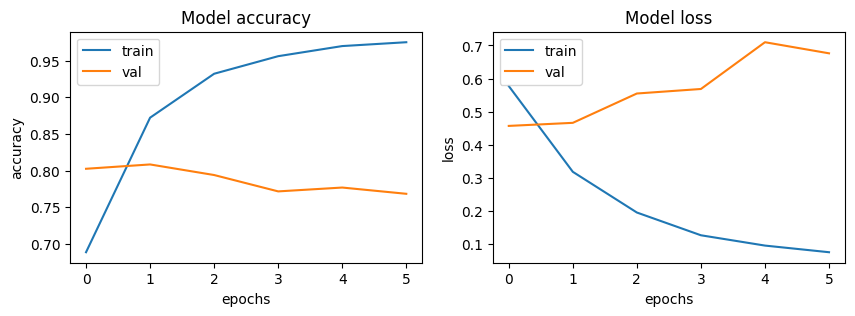

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    plt.savefig(DATA_DIR + "model_metrics.png")

In [24]:
live.end()

'/Users/blarhdir/Documents/sw-data-mlops-internship/data/counter.pckl' is busy, it is being blocked by:
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f
  (PID 6718): /Users/blarhdir/Documents/sw-data-mlops-internship/venv/bin/dvc repro -f

If there are no processes with such PIDs, you can manually remove '/Users/blarhdir/Documents/sw-data-mlops-internship/.dvc/tmp/rwlock' and try again.


In [25]:
# create a text file with the date and time of the experiment
import datetime
now = datetime.datetime.now()
with open(DATA_DIR + "experiment_end.txt", "w") as f:
    f.write(str(now))